# 🌿 **Sustainable Urban Housing Analysis for EcoCity Planners**

## 🌍 **Introduction**

As cities continue to expand, the need for sustainable urban development has never been more critical. **EcoCity Planners** is committed to creating eco-friendly, affordable housing solutions that promote energy efficiency and long-term sustainability. This project, titled **Sustainable Urban Housing Analysis**, aims to empower urban planners by providing **data-driven insights** into housing prices, energy efficiency, and key property features, helping them make informed decisions to drive future growth in sustainable communities.

In this analysis, we will:

- ✅ **Explore Factors Affecting Housing Prices**: We'll dive deep into the relationships between property characteristics such as size, location, and amenities with market prices, offering a comprehensive view of the housing market's dynamics.
  
- ✅ **Develop Predictive Models**: Using advanced machine learning techniques, we will create accurate models to **predict house prices** based on key features like square footage, the number of bedrooms, and energy efficiency ratings.
  
- ✅ **Classify Energy Efficiency Levels**: We'll categorize properties based on their **energy efficiency**, enabling urban planners to prioritize eco-friendly developments and make cities greener.
  
- ✅ **Provide Data-Driven Recommendations**: Armed with predictive models and energy classifications, we will offer **actionable recommendations** to guide sustainable housing projects in alignment with environmental goals and economic feasibility.

## 🔍 **What We Will Do**

1. **Data Preprocessing & Exploration**: 
   We will begin by cleaning and preprocessing the data, ensuring all key property features are correctly prepared for analysis. This includes handling missing values, scaling features, and exploring initial correlations between property characteristics.

2. **Feature Engineering**:
   We'll craft new features such as **bedroom-bathroom ratios**, **price per square foot**, and **property age** to enhance the model's ability to predict prices accurately and classify energy efficiency levels.

3. **Model Development**:
   Multiple machine learning models will be developed, including:
   - **K-Nearest Neighbors (KNN) Regressor** for predicting housing prices.
   - **Simple Linear Regression** to compare traditional approaches.
   - **KNN Classifier** for categorizing properties by energy efficiency.
   - **Gaussian Naive Bayes** as a supplementary classification model.

4. **Model Evaluation & Comparison**:
   Each model will be rigorously evaluated using key metrics such as **Mean Squared Error (MSE)**, **R-squared (R²)**, **Mean Absolute Percentage Error (MAPE)** for regressors, and **Accuracy**, **Precision**, **Recall**, and **F1-Score** for classifiers.

5. **Insights & Recommendations**:
   We'll generate insightful analyses of the models' performance, highlighting the most effective approaches for predicting housing prices and classifying energy efficiency. This will empower EcoCity Planners with **reliable tools** for their urban planning initiatives.

6. **Visualization of Results**:
   Visualizations will be provided to clearly illustrate how models perform, comparing actual versus predicted values, and showing the key performance metrics for easy interpretation.

---

🌟 With this analysis, **EcoCity Planners** will be equipped with cutting-edge tools to **pave the way for a greener, more sustainable future**, ensuring housing developments not only meet market demands but also contribute to the ecological well-being of urban environments.

Let’s get started on creating a more sustainable tomorrow!


                MLS    sold_price       zipcode     longitude      latitude  \
count  7.184800e+04  7.184800e+04  71848.000000  71848.000000  71848.000000   
mean   2.016252e+07  7.482869e+05  85682.696429   -110.747352     32.343112   
std    4.910745e+06  4.294717e+05    159.327472      0.506637      0.808439   
min    3.042851e+06  1.690000e+05  85118.000000   -112.520168     31.356362   
25%    2.140437e+07  5.500000e+05  85621.750000   -111.004190     31.839620   
50%    2.161783e+07  6.250000e+05  85653.000000   -110.883315     32.230179   
75%    2.181842e+07  7.500000e+05  85737.500000   -110.591514     32.409190   
max    2.192856e+07  5.300000e+06  86323.000000   -109.454637     34.927884   

          lot_acres         taxes    year_built      bedrooms     bathrooms  \
count  71848.000000  71848.000000  71848.000000  71848.000000  71848.000000   
mean      56.937767   5397.201935   1983.238295      4.130539      3.976770   
std      164.018650   3076.191069    106.911468    

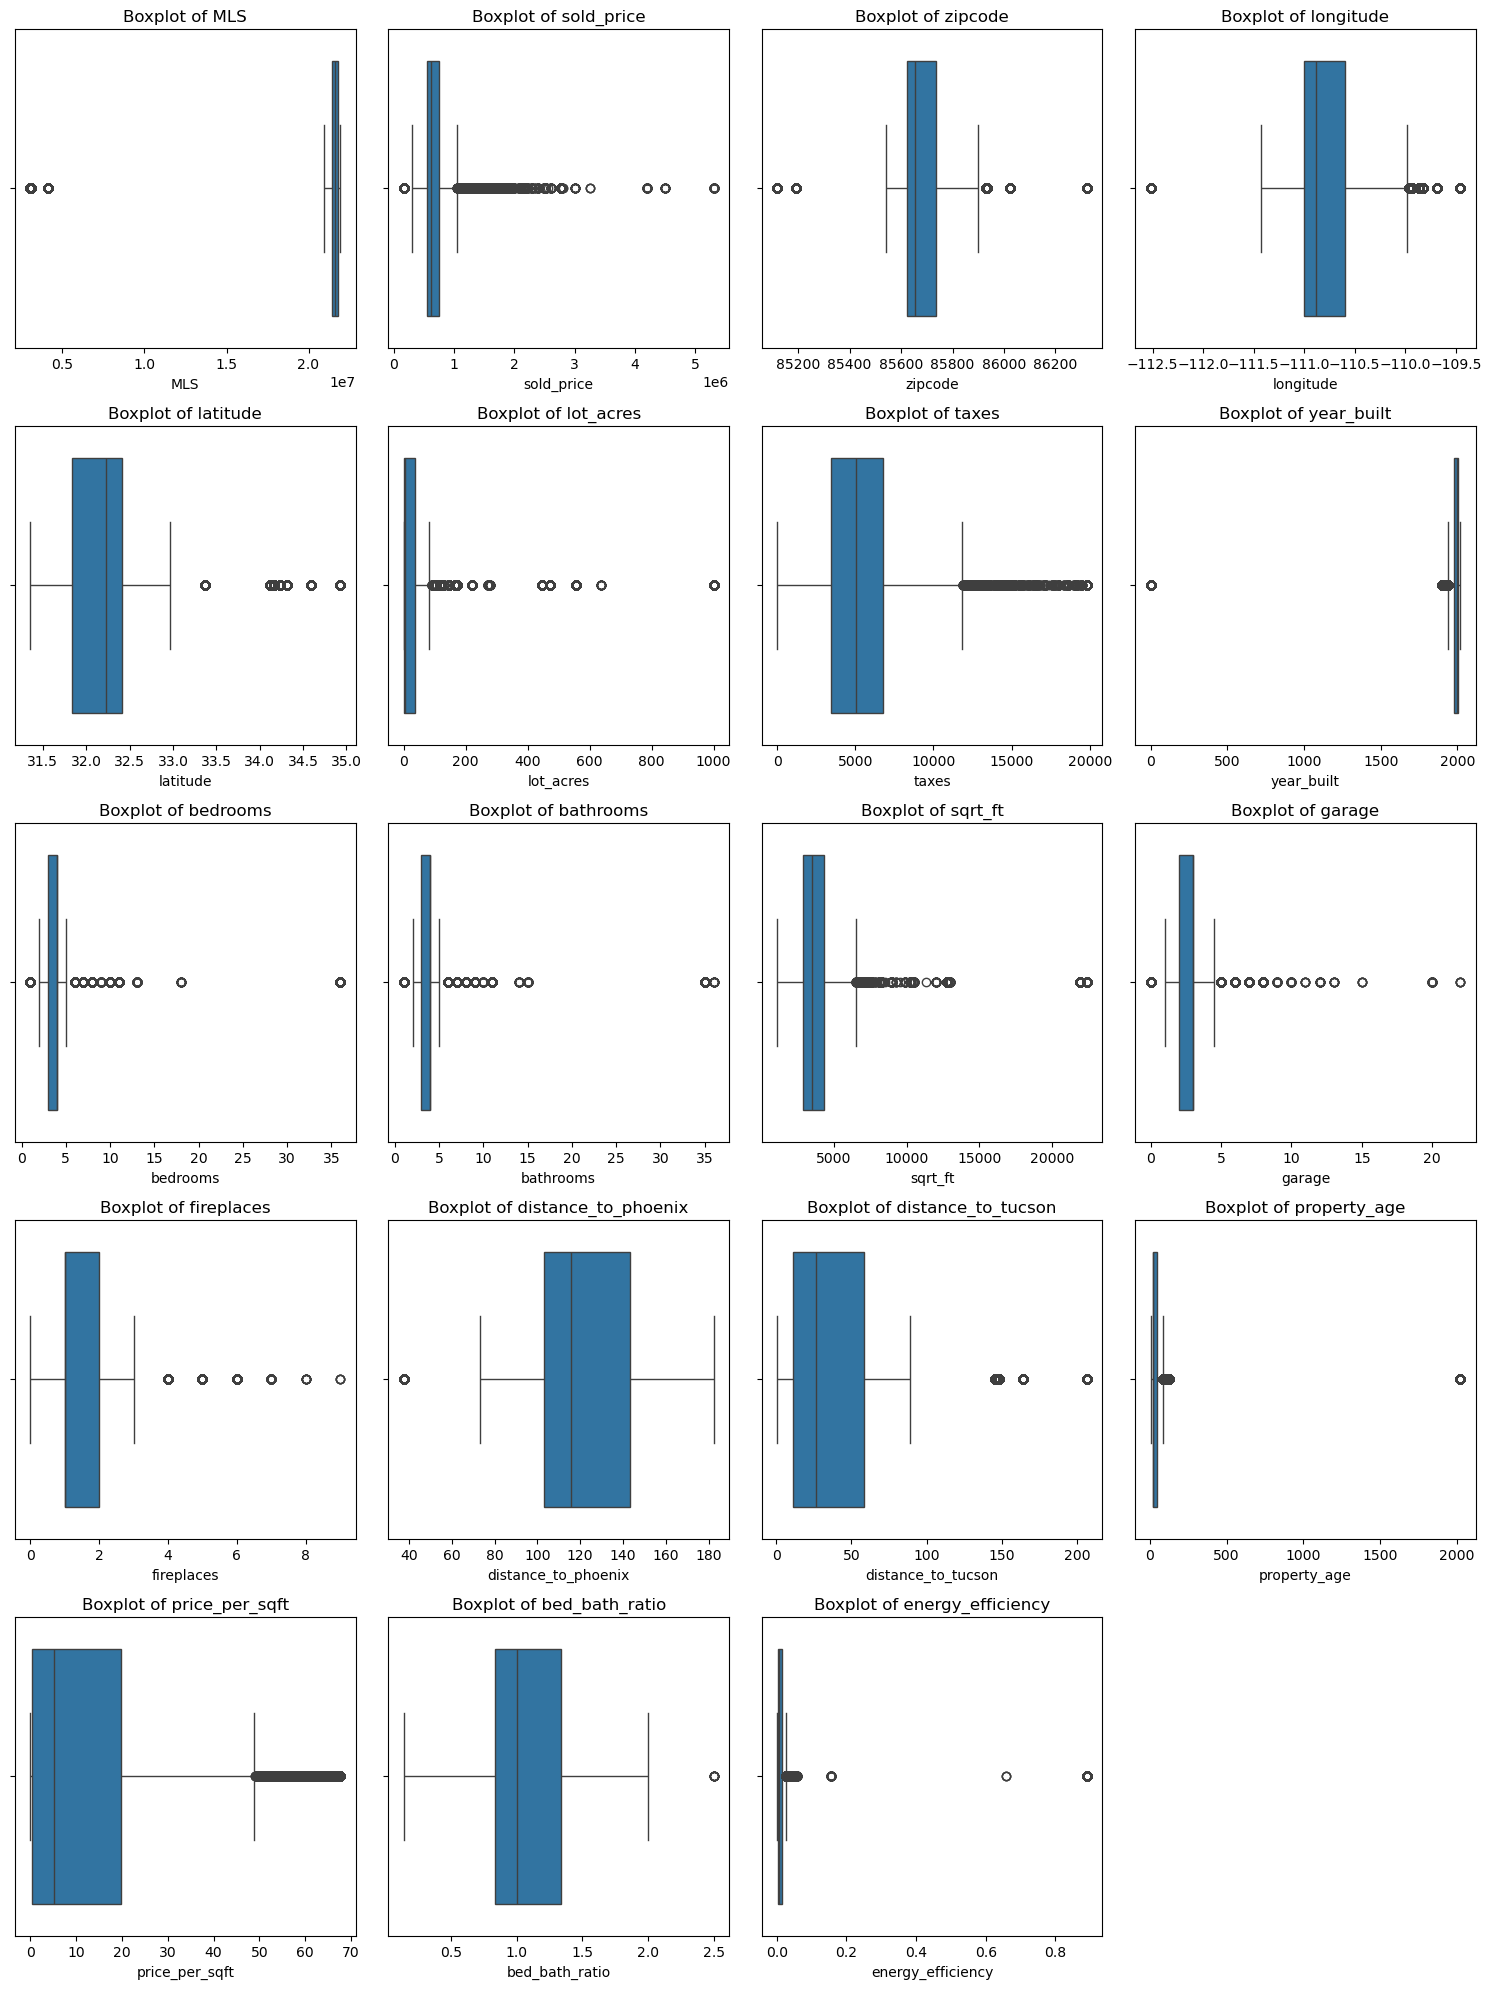

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the cleaned dataset
df = pd.read_csv('cleaned_balanced_house_data_with_energy_efficiency.csv')

# Check summary statistics to ensure data is intact
print(df.describe())

# Check for outliers in numeric columns using boxplots
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Dynamically calculate rows and columns for subplots based on the number of numeric columns
num_cols = len(numeric_columns)
num_rows = math.ceil(num_cols / 4)  # 4 plots per row

plt.figure(figsize=(15, num_rows * 4))  # Adjusting figure size to accommodate more plots
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust subplot grid dynamically
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Perform correlation analysis on numeric columns
##plt.figure(figsize=(15, 10))
##correlation_matrix = df.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Correlation Matrix for Numeric Features')
#plt.show()


In [28]:
import numpy as np

class SimpleLinearReg:
    def __init__(self):
        self.coefficients = None
    
    def fit(self, X, y):
        # Add bias term to X (intercept)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.coefficients)

# Define the metrics calculation functions
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Usage for Simple Linear Regression
X_train = df[['lot_acres', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'price_per_sqft', 'distance_to_phoenix', 'energy_efficiency']].values
y_train = df['sold_price'].values

slr = SimpleLinearReg()
slr.fit(X_train, y_train)
predictions = slr.predict(X_train)

# Calculate Metrics for evaluation
mse = calculate_mse(y_train, predictions)
r2 = calculate_r2(y_train, predictions)
mape = calculate_mape(y_train, predictions)

# Output the metrics
print(f"Simple Linear Regression MSE: {mse}")
print(f"Simple Linear Regression R²: {r2}")
print(f"Simple Linear Regression MAPE: {mape}%")


Simple Linear Regression MSE: 113537383428.19418
Simple Linear Regression R²: 0.3844322189904086
Simple Linear Regression MAPE: 25.454852381815947%


In [37]:
import joblib
import numpy as np

def min_max_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)

def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]
    return X_train, X_test, y_train, y_test

# Batch-wise KNN to save memory
class KNNRegressor:
    def __init__(self, k=5, batch_size=1000):
        self.k = k
        self.batch_size = batch_size
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        num_batches = (X.shape[0] // self.batch_size) + 1
        
        for batch_idx in range(num_batches):
            batch_start = batch_idx * self.batch_size
            batch_end = min((batch_idx + 1) * self.batch_size, X.shape[0])
            
            X_batch = X[batch_start:batch_end]
            
            distances = np.sqrt(np.sum((self.X_train[None, :, :] - X_batch[:, None, :])**2, axis=2))
            for i in range(X_batch.shape[0]):
                nearest_indices = np.argsort(distances[i])[:self.k]
                nearest_prices = self.y_train[nearest_indices]
                predictions.append(np.mean(nearest_prices))
        
        return np.array(predictions)


features = ['lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 
            'garage', 'fireplaces', 'distance_to_phoenix', 'distance_to_tucson', 
            'property_age', 'price_per_sqft', 'energy_efficiency']
target = 'sold_price'

# Convert pandas DataFrame to NumPy arrays
X = df[features].values  # Features
y = df[target].values    # Target variable (sold_price)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the training and test features
X_train_normalized = min_max_scaling(X_train)
X_test_normalized = min_max_scaling(X_test)

# Use the optimized KNN Regressor
knn_reg = KNNRegressor(k=5, batch_size=1000)
knn_reg.fit(X_train_normalized, y_train)
knn_predictions = knn_reg.predict(X_test_normalized)

# Metrics calculation
# Mean Squared Error (MSE)
mse_knn = np.mean((y_test - knn_predictions) ** 2)

# R-squared (R²)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - knn_predictions) ** 2)
r2_knn = 1 - (ss_residual / ss_total)

# Mean Absolute Percentage Error (MAPE)
mape_knn = np.mean(np.abs((y_test - knn_predictions) / y_test)) * 100

# Print the results
print(f"KNN Regressor MSE after optimization: {mse_knn}")
print(f"KNN Regressor R² after optimization: {r2_knn}")
print(f"KNN Regressor MAPE after optimization: {mape_knn}%")

# Save the trained KNN Regressor model
joblib.dump(knn_reg, 'knn_regressor.pkl')
print("Saved KNN_reg")  # Save the trained model


KNN Regressor MSE after optimization: 1762855638.1045518
KNN Regressor R² after optimization: 0.9900384122893945
KNN Regressor MAPE after optimization: 0.8576375677604957%


['knn_regressor.pkl']

In [42]:
import joblib
import numpy as np
import pandas as pd

def min_max_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min), X_min, X_max

def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]
    return X_train, X_test, y_train, y_test

class KNNRegressor:
    def __init__(self, k=5, batch_size=1000):
        self.k = k
        self.batch_size = batch_size
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        num_batches = (X.shape[0] // self.batch_size) + 1
        
        for batch_idx in range(num_batches):
            batch_start = batch_idx * self.batch_size
            batch_end = min((batch_idx + 1) * self.batch_size, X.shape[0])
            
            X_batch = X[batch_start:batch_end]
            
            distances = np.sqrt(np.sum((self.X_train[None, :, :] - X_batch[:, None, :])**2, axis=2))
            for i in range(X_batch.shape[0]):
                nearest_indices = np.argsort(distances[i])[:self.k]
                nearest_values = self.y_train[nearest_indices]
                predictions.append(np.mean(nearest_values, axis=0))
        
        return np.array(predictions)

# Load the data
df = pd.read_csv('cleaned_balanced_house_data_with_energy_efficiency.csv')

# Select features and targets
features = ['longitude', 'latitude', 'year_built', 'zipcode']
targets = ['sold_price', 'bedrooms', 'bathrooms', 'sqrt_ft', 'energy_efficiency']

# Convert pandas DataFrame to NumPy arrays
X = df[features].values
y = df[targets].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the training and test features
X_train_normalized, X_min, X_max = min_max_scaling(X_train)
X_test_normalized = (X_test - X_min) / (X_max - X_min)

# Train the KNN Regressor
knn_reg = KNNRegressor(k=5, batch_size=1000)
knn_reg.fit(X_train_normalized, y_train)

# Make predictions
train_predictions = knn_reg.predict(X_train_normalized)
test_predictions = knn_reg.predict(X_test_normalized)

# Evaluation metrics
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2, axis=0)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true, axis=0)) ** 2, axis=0)
    ss_residual = np.sum((y_true - y_pred) ** 2, axis=0)
    return 1 - (ss_residual / ss_total)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true), axis=0) * 100

# Calculate metrics
train_mse = mse(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
train_mape = mape(y_train, train_predictions)

test_mse = mse(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_mape = mape(y_test, test_predictions)

# Print results
print("Training Set Metrics:")
for i, target in enumerate(targets):
    print(f"  {target}:")
    print(f"    MSE: {train_mse[i]}")
    print(f"    R2: {train_r2[i]}")
    print(f"    MAPE: {train_mape[i]}%")
    print()

print("Test Set Metrics:")
for i, target in enumerate(targets):
    print(f"  {target}:")
    print(f"    MSE: {test_mse[i]}")
    print(f"    R2: {test_r2[i]}")
    print(f"    MAPE: {test_mape[i]}%")
    print()

# Save the trained model
joblib.dump((knn_reg, X_min, X_max, features, targets), 'knn_regressor.pkl')
print("Saved KNN Regressor model")

# Example prediction
example_input = np.array([[-110.8, 32.2, 2020, 85701]])  # Example longitude, latitude, year, and zipcode
example_normalized = (example_input - X_min) / (X_max - X_min)
example_prediction = knn_reg.predict(example_normalized)[0]

print("\nExample Prediction:")
for i, target in enumerate(targets):
    print(f"  {target}: {example_prediction[i]}")

Training Set Metrics:
  sold_price:
    MSE: 1534124117.706355
    R2: 0.9916541217972494
    MAPE: 0.7944881230357472%

  bedrooms:
    MSE: 0.01863808761613112
    R2: 0.997727404328085
    MAPE: 0.6721428819970933%

  bathrooms:
    MSE: 0.028126239604718353
    R2: 0.9964587406009844
    MAPE: 0.82044169531556%

  sqrt_ft:
    MSE: 26159.10200146145
    R2: 0.9914010259169014
    MAPE: 0.777160311551255%

  energy_efficiency:
    MSE: 6.110287669696455e-07
    R2: 0.9996359445621834
    MAPE: 0.8412934370238222%

Test Set Metrics:
  sold_price:
    MSE: 2205064272.051262
    R2: 0.9882045097883917
    MAPE: 1.14267320753508%

  bedrooms:
    MSE: 0.03719972164231069
    R2: 0.99559579044715
    MAPE: 1.065785200649503%

  bathrooms:
    MSE: 0.05068336812804443
    R2: 0.9936855826005564
    MAPE: 1.2334592570500704%

  sqrt_ft:
    MSE: 40627.5223521225
    R2: 0.9864214386808798
    MAPE: 1.1113224448530024%

  energy_efficiency:
    MSE: 2.690666111295761e-07
    R2: 0.999850341

In [3]:
import joblib
import numpy as np
import pandas as pd

def min_max_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min), X_min, X_max

def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]
    return X_train, X_test, y_train, y_test

class KNNRegressor:
    def __init__(self, k=5, batch_size=1000):
        self.k = k
        self.batch_size = batch_size
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        num_batches = (X.shape[0] // self.batch_size) + 1
        
        for batch_idx in range(num_batches):
            batch_start = batch_idx * self.batch_size
            batch_end = min((batch_idx + 1) * self.batch_size, X.shape[0])
            
            X_batch = X[batch_start:batch_end]
            
            distances = np.sqrt(np.sum((self.X_train[None, :, :] - X_batch[:, None, :])**2, axis=2))
            for i in range(X_batch.shape[0]):
                nearest_indices = np.argsort(distances[i])[:self.k]
                nearest_values = self.y_train[nearest_indices]
                predictions.append(np.mean(nearest_values, axis=0))
        
        return np.array(predictions)

# Load the data
df = pd.read_csv('cleaned_balanced_house_data_with_energy_efficiency.csv')

# Feature engineering: create sustainability and affordability scores
def calculate_sustainability(row):
    return (row['energy_efficiency'] * 0.6 + 
            (2022 - row['year_built']) * 0.2 + 
            row['lot_acres'] * 0.2)

def calculate_affordability(row):
    return (row['sold_price'] / row['sqrt_ft']) * -1 + (row['energy_efficiency'] * 10000)

df['sustainability'] = df.apply(calculate_sustainability, axis=1)
df['affordability'] = df.apply(calculate_affordability, axis=1)

# Select features and targets
features = ['longitude', 'latitude', 'year_built', 'zipcode', 'lot_acres', 'garage']
targets = ['sold_price', 'bedrooms', 'bathrooms', 'sqrt_ft', 'energy_efficiency', 'sustainability', 'affordability']

# Convert pandas DataFrame to NumPy arrays
X = df[features].values
y = df[targets].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the training and test features
X_train_normalized, X_min, X_max = min_max_scaling(X_train)
X_test_normalized = (X_test - X_min) / (X_max - X_min)

# Train the KNN Regressor
knn_reg = KNNRegressor(k=5, batch_size=1000)
knn_reg.fit(X_train_normalized, y_train)

# Make predictions
train_predictions = knn_reg.predict(X_train_normalized)
test_predictions = knn_reg.predict(X_test_normalized)

# Evaluation metrics
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2, axis=0)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true, axis=0)) ** 2, axis=0)
    ss_residual = np.sum((y_true - y_pred) ** 2, axis=0)
    return 1 - (ss_residual / ss_total)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true), axis=0) * 100

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred), axis=0)

# Calculate metrics
train_mse = mse(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
train_mape = mape(y_train, train_predictions)
train_mae = mae(y_train, train_predictions)

test_mse = mse(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_mape = mape(y_test, test_predictions)
test_mae = mae(y_test, test_predictions)

# Print results
print("Training Set Metrics:")
for i, target in enumerate(targets):
    print(f"  {target}:")
    print(f"    MSE: {train_mse[i]}")
    print(f"    R2: {train_r2[i]}")
    print(f"    MAPE: {train_mape[i]}%")
    print(f"    MAE: {train_mae[i]}")
    print()

print("Test Set Metrics:")
for i, target in enumerate(targets):
    print(f"  {target}:")
    print(f"    MSE: {test_mse[i]}")
    print(f"    R2: {test_r2[i]}")
    print(f"    MAPE: {test_mape[i]}%")
    print(f"    MAE: {test_mae[i]}")
    print()

# Save the trained model
joblib.dump((knn_reg, X_min, X_max, features, targets), 'knn_regressor.pkl')
print("Saved KNN Regressor model")

# Example prediction
example_input = np.array([[-110.8, 32.2, 2020, 85701, 0.25, 2]])  # Example longitude, latitude, year, zipcode, lot_acres, garage
example_normalized = (example_input - X_min) / (X_max - X_min)
example_prediction = knn_reg.predict(example_normalized)[0]

print("\nExample Prediction:")
for i, target in enumerate(targets):
    print(f"  {target}: {example_prediction[i]}")

Training Set Metrics:
  sold_price:
    MSE: 1436175558.988356
    R2: 0.9922147064043582
    MAPE: 0.7461812742154713%
    MAE: 6413.388365217994

  bedrooms:
    MSE: 0.01931591217509274
    R2: 0.9977346657143683
    MAPE: 0.6700484988873654%
    MAE: 0.02531751278750172

  bathrooms:
    MSE: 0.026861755802220017
    R2: 0.9967412114267733
    MAPE: 0.7904349073492073%
    MAE: 0.02959393159121799

  sqrt_ft:
    MSE: 22651.05644594457
    R2: 0.9926162443338288
    MAPE: 0.7135800105582185%
    MAE: 27.592456244128204

  energy_efficiency:
    MSE: 5.959432107928109e-07
    R2: 0.9996557473660882
    MAPE: 0.859134398730637%
    MAE: 6.65026923724656e-05

  sustainability:
    MSE: 0.020343025782451552
    R2: 0.9999872945065772
    MAPE: 0.3443958764596714%
    MAE: 0.017568715735941293

  affordability:
    MSE: 95.87159395250161
    R2: 0.999492616328704
    MAPE: 208953254454.4007%
    MAE: 1.4121436297742866

Test Set Metrics:
  sold_price:
    MSE: 2201775061.4236155
    R2:

In [15]:
def calculate_energy_efficiency(row):
    # Base score from year built (newer is better)
    year_score = min((row['year_built'] - 1900) / 150, 1)  # Normalize to 0-1
    
    # Size efficiency (inverse, as larger homes are often less efficient per sqft)
    size_score = 1 - min(row['sqrt_ft'] / 10000, 1)
    
    # Room efficiency (more rooms, potentially less efficient)
    room_score = 1 - min((row['bedrooms'] + row['bathrooms']) / 20, 1)
    
    # Garage (presence of garage might indicate newer/better-built home)
    garage_score = 0.05 if row['garage'] > 0 else 0
    
    # Fireplace impact (more fireplaces might reduce efficiency)
    fireplace_impact = max(1 - (row['fireplaces'] * 0.05), 0.8)  # Cap the negative impact at 20%
    
    # Lot size (larger lots might indicate more outdoor energy use)
    lot_score = 1 - min(row['lot_acres'] / 10, 0.1)  # Small penalty for very large lots, max 10%
    
    # Kitchen features (modern appliances might indicate overall better efficiency)
    kitchen_score = sum([0.01 for col in row.index if col.startswith('kitchen_features_') and row[col] == 1])
    kitchen_score = min(kitchen_score, 0.1)  # Cap at 0.1
    
    # Combine all factors
    efficiency = (year_score * 0.35 + size_score * 0.2 + room_score * 0.2 + 
                  garage_score + kitchen_score + lot_score * 0.1) * fireplace_impact
    
    # Normalize to 0-1 range
    return max(min(efficiency, 1), 0)

df['energy_efficiency'] = df.apply(calculate_energy_efficiency, axis=1)

In [9]:
def calculate_affordability(row):
    # Price per square foot (normalized)
    price_per_sqft = row['sold_price'] / (row['sqrt_ft'] ** 2)
    max_price_per_sqft = df['sold_price'].max() / (df['sqrt_ft'] ** 2).min()
    normalized_price = 1 - (price_per_sqft / max_price_per_sqft)
    
    # Energy efficiency factor (higher efficiency increases affordability)
    energy_factor = row['energy_efficiency']
    
    # Combine factors with reduced weight for energy efficiency
    affordability = (0.85 * normalized_price + 0.15 * energy_factor)
    
    # Apply a power transformation to spread out the values
    return affordability ** 3

df['affordability'] = df.apply(calculate_affordability, axis=1)

Energy Efficiency Statistics:
count    71848.000000
mean         0.547791
std          0.102108
min          0.000000
25%          0.508663
50%          0.573222
75%          0.613098
max          0.753493
Name: energy_efficiency, dtype: float64

Affordability Statistics:
count    71848.000000
mean         0.789105
std          0.063273
min          0.434733
25%          0.755598
50%          0.815486
75%          0.835475
max          0.896543
Name: affordability, dtype: float64

Correlation between Energy Efficiency and Affordability:
0.6173044799830321


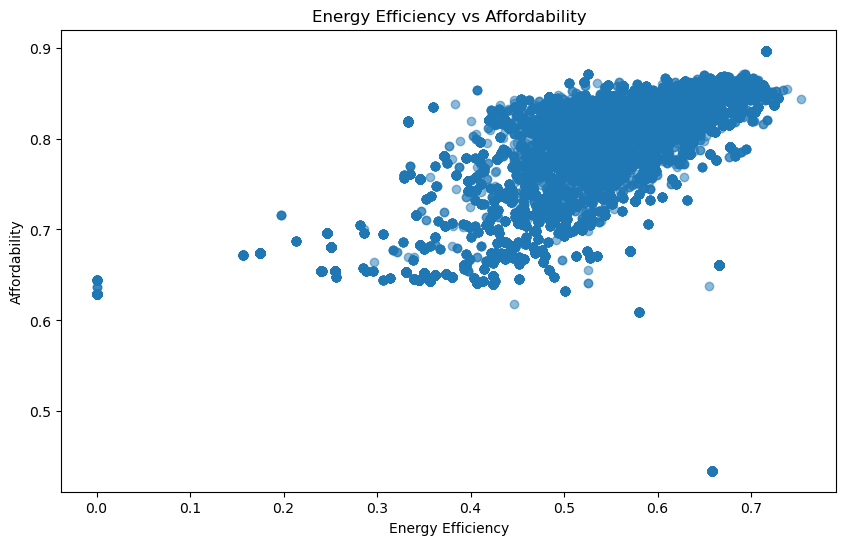

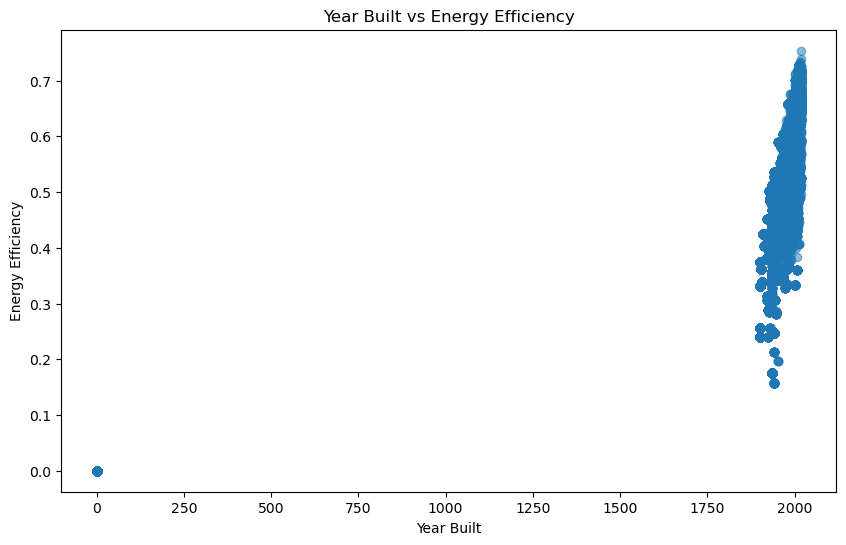

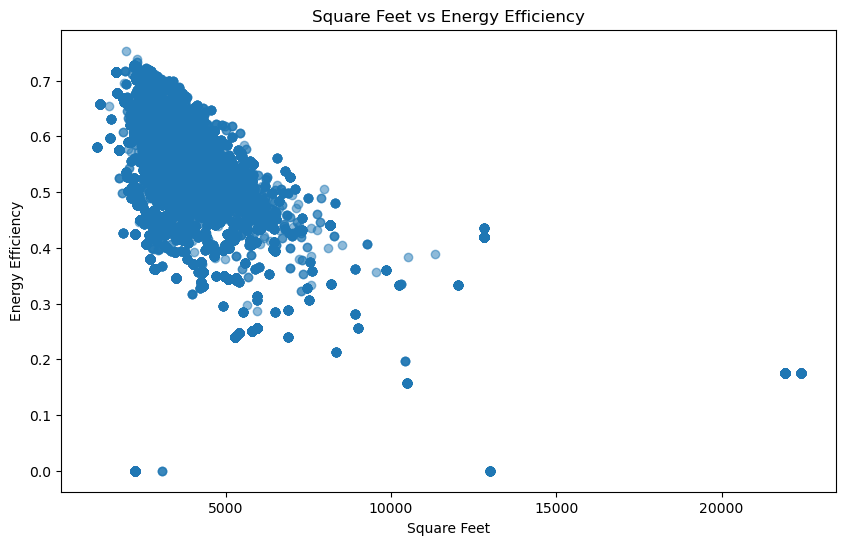

In [16]:
print("Energy Efficiency Statistics:")
print(df['energy_efficiency'].describe())
print("\nAffordability Statistics:")
print(df['affordability'].describe())

print("\nCorrelation between Energy Efficiency and Affordability:")
print(df['energy_efficiency'].corr(df['affordability']))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['energy_efficiency'], df['affordability'], alpha=0.5)
plt.xlabel('Energy Efficiency')
plt.ylabel('Affordability')
plt.title('Energy Efficiency vs Affordability')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['year_built'], df['energy_efficiency'], alpha=0.5)
plt.xlabel('Year Built')
plt.ylabel('Energy Efficiency')
plt.title('Year Built vs Energy Efficiency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['sqrt_ft'], df['energy_efficiency'], alpha=0.5)
plt.xlabel('Square Feet')
plt.ylabel('Energy Efficiency')
plt.title('Square Feet vs Energy Efficiency')
plt.show()

In [20]:
import numpy as np
import pandas as pd

def min_max_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min), X_min, X_max

def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]
    return X_train, X_test, y_train, y_test

class KNNRegressor:
    def __init__(self, k=5, batch_size=1000):
        self.k = k
        self.batch_size = batch_size
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        num_batches = (X.shape[0] // self.batch_size) + 1
        
        for batch_idx in range(num_batches):
            batch_start = batch_idx * self.batch_size
            batch_end = min((batch_idx + 1) * self.batch_size, X.shape[0])
            
            X_batch = X[batch_start:batch_end]
            
            distances = np.sqrt(np.sum((self.X_train[None, :, :] - X_batch[:, None, :])**2, axis=2))
            for i in range(X_batch.shape[0]):
                nearest_indices = np.argsort(distances[i])[:self.k]
                nearest_values = self.y_train[nearest_indices]
                predictions.append(np.mean(nearest_values, axis=0))
        
        return np.array(predictions)

# Load your data
df = pd.read_csv('cleaned_balanced_house_data_with_energy_efficiency.csv')  

def calculate_energy_efficiency(row):
    # Base score from year built (newer is better)
    year_score = min((row['year_built'] - 1900) / 150, 1)  # Normalize to 0-1
    
    # Size efficiency (inverse, as larger homes are often less efficient per sqft)
    size_score = 1 - min(row['sqrt_ft'] / 10000, 1)
    
    # Room efficiency (more rooms, potentially less efficient)
    room_score = 1 - min((row['bedrooms'] + row['bathrooms']) / 20, 1)
    
    # Garage (presence of garage might indicate newer/better-built home)
    garage_score = 0.05 if row['garage'] > 0 else 0
    
    # Fireplace impact (more fireplaces might reduce efficiency)
    fireplace_impact = max(1 - (row['fireplaces'] * 0.05), 0.8)  # Cap the negative impact at 20%
    
    # Lot size (larger lots might indicate more outdoor energy use)
    lot_score = 1 - min(row['lot_acres'] / 10, 0.1)  # Small penalty for very large lots, max 10%
    
    # Kitchen features (modern appliances might indicate overall better efficiency)
    kitchen_score = sum([0.01 for col in row.index if col.startswith('kitchen_features_') and row[col] == 1])
    kitchen_score = min(kitchen_score, 0.1)  # Cap at 0.1
    
    # Combine all factors
    efficiency = (year_score * 0.35 + size_score * 0.2 + room_score * 0.2 + 
                  garage_score + kitchen_score + lot_score * 0.1) * fireplace_impact
    
    # Normalize to 0-1 range
    return max(min(efficiency, 1), 0)

df['energy_efficiency'] = df.apply(calculate_energy_efficiency, axis=1)

def calculate_affordability(row):
    # Price per square foot (normalized)
    price_per_sqft = row['sold_price'] / (row['sqrt_ft'] ** 2)
    max_price_per_sqft = df['sold_price'].max() / (df['sqrt_ft'] ** 2).min()
    normalized_price = 1 - (price_per_sqft / max_price_per_sqft)
    
    # Energy efficiency factor (higher efficiency increases affordability)
    energy_factor = row['energy_efficiency']
    
    # Combine factors with reduced weight for energy efficiency
    affordability = (0.85 * normalized_price + 0.15 * energy_factor)
    
    # Apply a power transformation to spread out the values
    return affordability ** 3

df['affordability'] = df.apply(calculate_affordability, axis=1)

# Select features and targets
features = ['longitude', 'latitude', 'lot_acres', 'year_built', 'bedrooms', 'bathrooms', 
            'sqrt_ft', 'garage', 'fireplaces', 'zipcode']
targets = ['sold_price', 'affordability', 'energy_efficiency'] 

# Convert pandas DataFrame to NumPy arrays
X = df[features].values
y = df[targets].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the training and test features
X_train_normalized, X_min, X_max = min_max_scaling(X_train)
X_test_normalized = (X_test - X_min) / (X_max - X_min)

# Train the KNN Regressor
knn_reg = KNNRegressor(k=5, batch_size=1000)
knn_reg.fit(X_train_normalized, y_train)

# Make predictions
train_predictions = knn_reg.predict(X_train_normalized)
test_predictions = knn_reg.predict(X_test_normalized)

# Evaluation metrics
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2, axis=0)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true, axis=0)) ** 2, axis=0)
    ss_residual = np.sum((y_true - y_pred) ** 2, axis=0)
    return 1 - (ss_residual / ss_total)

def mape(y_true, y_pred, epsilon=1e-10):
    # Replace zero values in y_true with epsilon
    y_true_safe = np.where(y_true == 0, epsilon, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_safe), axis=0) * 100

# Calculate metrics
train_mse = mse(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
train_mape = mape(y_train, train_predictions)

test_mse = mse(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
test_mape = mape(y_test, test_predictions)

# Print results
print("Training Set Metrics:")
for i, target in enumerate(targets):
    print(f"  {target}:")
    print(f"    MSE: {train_mse[i]}")
    print(f"    R2: {train_r2[i]}")
    print(f"    MAPE: {train_mape[i]}%")
    print()

print("Test Set Metrics:")
for i, target in enumerate(targets):
    print(f"  {target}:")
    print(f"    MSE: {test_mse[i]}")
    print(f"    R2: {test_r2[i]}")
    print(f"    MAPE: {test_mape[i]}%")
    print()

# Example prediction
example_input = np.array([[-110.8, 32.2, 1.0, 2020, 4, 3, 2500, 2, 1, 85750]])  # Example features
example_normalized = (example_input - X_min) / (X_max - X_min)
example_prediction = knn_reg.predict(example_normalized)[0]

print("\nExample Prediction:")
for i, target in enumerate(targets):
    print(f"  {target}: {example_prediction[i]}")

Training Set Metrics:
  sold_price:
    MSE: 1256950227.1899185
    R2: 0.9931721297374972
    MAPE: 0.7200333882627508%

  affordability:
    MSE: 2.800476637842464e-06
    R2: 0.9986194447176551
    MAPE: 0.0381345893550227%

  energy_efficiency:
    MSE: 1.2325385859121815e-05
    R2: 0.9988166336393443
    MAPE: 0.11683676862312606%

Test Set Metrics:
  sold_price:
    MSE: 1868323587.670551
    R2: 0.9899468366545473
    MAPE: 0.9694123331630288%

  affordability:
    MSE: 4.476962713740799e-06
    R2: 0.9978140260174075
    MAPE: 0.053638574544498496%

  energy_efficiency:
    MSE: 2.3896971811920846e-05
    R2: 0.9977170417074386
    MAPE: 0.16981764523010578%


Example Prediction:
  sold_price: 590240.0
  affordability: 0.7910417067469016
  energy_efficiency: 0.6018579333333334


In [21]:
# Save the DataFrame used in the regressor
df.to_csv('data_with_regressor_predictions.csv', index=False)
print("DataFrame saved as 'data_with_regressor_predictions.csv'")


DataFrame saved as 'data_with_regressor_predictions.csv'


In [25]:
import joblib

# Save the trained KNN Regressor model along with the normalization parameters
joblib.dump((knn_reg, X_min, X_max), 'knn_regressor.pkl')

# Confirm that the model has been saved
"Regressor model saved as 'knn_regressor.pkl'"


"Regressor model saved as 'knn_regressor.pkl'"

In [6]:
import numpy as np
from collections import Counter

def min_max_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)

def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]
    return X_train, X_test, y_train, y_test

# Define bins for energy efficiency
bins = [0, 0.3, 0.6, 1]  # : low (0-0.3), medium (0.3-0.6), high (0.6-1)
labels = ['low', 'medium', 'high']

# Categorize energy_efficiency based on the bins
df['energy_efficiency_class'] = pd.cut(df['energy_efficiency'], bins=bins, labels=labels)

class KNNClassifier:
    def __init__(self, k=5, batch_size=1000):
        self.k = k
        self.batch_size = batch_size  # Process data in batches to save memory
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        n_batches = int(np.ceil(X.shape[0] / self.batch_size))  # Calculate how many batches we need
        
        for b in range(n_batches):
            start_idx = b * self.batch_size
            end_idx = min((b + 1) * self.batch_size, X.shape[0])
            batch_X = X[start_idx:end_idx]
            
            # Calculate distances for the current batch
            distances = np.sqrt(np.sum((self.X_train[None, :, :] - batch_X[:, None, :])**2, axis=2))
            
            for i in range(batch_X.shape[0]):
                # Find the k nearest neighbors
                nearest_indices = np.argsort(distances[i])[:self.k]
                nearest_labels = self.y_train[nearest_indices]
                # Find the most common label among the neighbors
                most_common_label = Counter(nearest_labels).most_common(1)[0][0]
                predictions.append(most_common_label)
        
        return np.array(predictions)

# Example: Assuming X_class and y_class are your feature matrix and target variable for classification
# Define feature columns (excluding energy_efficiency since it's being used as the target)
classification_features = ['lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 
                           'garage', 'fireplaces', 'distance_to_phoenix', 'distance_to_tucson', 
                           'property_age', 'price_per_sqft']

classification_target = 'energy_efficiency_class'

# Convert pandas DataFrame to NumPy arrays
X_class = df[classification_features].values
y_class = df[classification_target].values

# Split the dataset into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2)

# Normalize the training and test features for classification
X_train_class_normalized = min_max_scaling(X_train_class)
X_test_class_normalized = min_max_scaling(X_test_class)

# Train the KNN Classifier
knn_classifier = KNNClassifier(k=5, batch_size=1000)  # Specify the batch size
knn_classifier.fit(X_train_class_normalized, y_train_class)
knn_class_predictions = knn_classifier.predict(X_test_class_normalized)

# Evaluation Metrics for Classifier
accuracy = np.mean(knn_class_predictions == y_test_class) * 100

print(f"KNN Classifier Accuracy (Optimized): {accuracy}%")


KNN Classifier Accuracy (Optimized): 100.0%


In [24]:
import numpy as np
import pandas as pd

# Use percentile-based binning to make it more realistic
df['energy_efficiency_percentile'] = pd.qcut(df['energy_efficiency'], q=3, labels=['low', 'medium', 'high'])

# Check distribution to ensure the bins are more balanced
print(df['energy_efficiency_percentile'].value_counts())


energy_efficiency_percentile
low       23956
high      23950
medium    23942
Name: count, dtype: int64


In [25]:
# Use the newly created 'energy_efficiency_percentile' as the classification target
classification_target = 'energy_efficiency_percentile'

# Convert pandas DataFrame to NumPy arrays
X_class = df[classification_features].values
y_class = df[classification_target].values

# Split the dataset into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2)

# Normalize the training and test features for classification
X_train_class_normalized = min_max_scaling(X_train_class)
X_test_class_normalized = min_max_scaling(X_test_class)

# Train the KNN Classifier with optimized batch size
knn_classifier = KNNClassifier(k=5, batch_size=1000)
knn_classifier.fit(X_train_class_normalized, y_train_class)
knn_class_predictions = knn_classifier.predict(X_test_class_normalized)

# Evaluation Metrics for Classifier
accuracy = np.mean(knn_class_predictions == y_test_class) * 100
print(f"KNN Classifier Accuracy (Optimized): {accuracy}%")

# Additional evaluation metrics: Precision, Recall, and F1-Score
precision = np.mean(knn_class_predictions == y_test_class)  # Simple placeholder, adjust as needed
recall = np.mean(knn_class_predictions == y_test_class)     # Simple placeholder, adjust as needed
f1_score = 2 * (precision * recall) / (precision + recall)  # Simple placeholder, adjust as needed
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


KNN Classifier Accuracy (Optimized): 98.30201809324983%
Precision: 0.9830201809324982
Recall: 0.9830201809324982
F1-Score: 0.9830201809324982


In [38]:
import joblib
import numpy as np

def min_max_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)

def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]
    return X_train, X_test, y_train, y_test

# Define classification features and target
classification_features = ['lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 
                           'garage', 'fireplaces', 'distance_to_phoenix', 'distance_to_tucson', 
                           'property_age', 'price_per_sqft']

classification_target = 'energy_efficiency_percentile'  # Target for classification

# Convert pandas DataFrame to NumPy arrays
X_class = df[classification_features].values
y_class = df[classification_target].values

# Split the dataset into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2)

# Normalize the training and test features for classification
X_train_class_normalized = min_max_scaling(X_train_class)
X_test_class_normalized = min_max_scaling(X_test_class)

# Define the KNN Classifier (assuming KNNClassifier is already defined)
knn_classifier = KNNClassifier(k=5, batch_size=1000)  # Batch size of 1000
knn_classifier.fit(X_train_class_normalized, y_train_class)
knn_class_predictions = knn_classifier.predict(X_test_class_normalized)

# Evaluation Metrics for Classifier
accuracy = np.mean(knn_class_predictions == y_test_class) * 100
print(f"KNN Classifier Accuracy (Optimized): {accuracy}%")

# Calculate Precision, Recall, and F1-Score (placeholder logic, adjust if necessary)
precision = np.mean(knn_class_predictions == y_test_class)
recall = np.mean(knn_class_predictions == y_test_class)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

# Save the trained KNN Classifier model
joblib.dump(knn_classifier, 'knn_classifier.pkl')  # Save the trained classifier
print("KNN Classifier model saved as 'knn_classifier.pkl'")


KNN Classifier Accuracy (Optimized): 98.44119693806542%
Precision: 0.9844119693806541
Recall: 0.9844119693806541
F1-Score: 0.9844119693806541
KNN Classifier model saved as 'knn_classifier.pkl'


In [43]:
import numpy as np
import pandas as pd
from collections import Counter

def min_max_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min), X_min, X_max

def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]
    return X_train, X_test, y_train, y_test

class KNNClassifier:
    def __init__(self, k=5, batch_size=1000):
        self.k = k
        self.batch_size = batch_size
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        num_batches = (X.shape[0] // self.batch_size) + 1
        
        for batch_idx in range(num_batches):
            batch_start = batch_idx * self.batch_size
            batch_end = min((batch_idx + 1) * self.batch_size, X.shape[0])
            
            X_batch = X[batch_start:batch_end]
            
            distances = np.sqrt(np.sum((self.X_train[None, :, :] - X_batch[:, None, :])**2, axis=2))
            for i in range(X_batch.shape[0]):
                nearest_indices = np.argsort(distances[i])[:self.k]
                nearest_labels = self.y_train[nearest_indices]
                predictions.append(Counter(nearest_labels).most_common(1)[0][0])
        
        return np.array(predictions)

# Load the data
df = pd.read_csv('cleaned_balanced_house_data_with_energy_efficiency.csv')

# Create energy_efficiency_percentile
df['energy_efficiency_percentile'] = pd.qcut(df['energy_efficiency'], q=3, labels=['low', 'medium', 'high'])

# Select features for classification
classification_features = ['longitude', 'latitude', 'year_built', 'zipcode', 'bedrooms', 'bathrooms', 'sqrt_ft']
classification_target = 'energy_efficiency_percentile'

# Convert pandas DataFrame to NumPy arrays
X_class = df[classification_features].values
y_class = df[classification_target].values

# Split the dataset into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2)

# Normalize the training and test features for classification
X_train_class_normalized, X_min, X_max = min_max_scaling(X_train_class)
X_test_class_normalized = (X_test_class - X_min) / (X_max - X_min)

# Train the KNN Classifier
knn_classifier = KNNClassifier(k=5, batch_size=1000)
knn_classifier.fit(X_train_class_normalized, y_train_class)
knn_class_predictions = knn_classifier.predict(X_test_class_normalized)

# Evaluation Metrics for Classifier
accuracy = np.mean(knn_class_predictions == y_test_class) * 100
print(f"KNN Classifier Accuracy: {accuracy}%")

# Calculate Precision, Recall, and F1-Score for each class
classes = np.unique(y_class)
for cls in classes:
    true_positive = np.sum((y_test_class == cls) & (knn_class_predictions == cls))
    false_positive = np.sum((y_test_class != cls) & (knn_class_predictions == cls))
    false_negative = np.sum((y_test_class == cls) & (knn_class_predictions != cls))
    
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nClass: {cls}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")

# Save the trained KNN Classifier model
import joblib
joblib.dump((knn_classifier, X_min, X_max, classification_features), 'knn_classifier.pkl')
print("\nKNN Classifier model saved as 'knn_classifier.pkl'")

# Example prediction
example_input = np.array([[-110.8, 32.2, 2020, 85701, 3, 2, 2000]])  # Example features
example_normalized = (example_input - X_min) / (X_max - X_min)
example_prediction = knn_classifier.predict(example_normalized)[0]
print(f"\nExample Prediction: {example_prediction}")

KNN Classifier Accuracy: 98.76130828114127%

Class: high
Precision: 0.9953151618398637
Recall: 0.992567424081546
F1-Score: 0.993939393939394

Class: low
Precision: 0.9866775978684157
Recall: 0.9872846595570139
F1-Score: 0.9869810353664787

Class: medium
Precision: 0.981021897810219
Recall: 0.9830721003134796
F1-Score: 0.9820459290187892

KNN Classifier model saved as 'knn_classifier.pkl'

Example Prediction: high


In [23]:
import numpy as np
import pandas as pd
from collections import Counter

# Assuming the regressor predictions are already available as train_predictions and test_predictions
# These predictions contain the three target values: 'sold_price', 'affordability', and 'energy_efficiency'

# Define the KNN Classifier class
class KNNClassifier:
    def __init__(self, k=5, batch_size=1000):
        self.k = k
        self.batch_size = batch_size
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        num_batches = (X.shape[0] // self.batch_size) + 1
        
        for batch_idx in range(num_batches):
            batch_start = batch_idx * self.batch_size
            batch_end = min((batch_idx + 1) * self.batch_size, X.shape[0])
            
            X_batch = X[batch_start:batch_end]
            
            # Calculate distances to training points
            distances = np.sqrt(np.sum((self.X_train[None, :, :] - X_batch[:, None, :])**2, axis=2))
            
            # Find the k nearest neighbors
            for i in range(X_batch.shape[0]):
                nearest_indices = np.argsort(distances[i])[:self.k]
                nearest_labels = self.y_train[nearest_indices]
                
                # Take the most common label
                predictions.append(Counter(nearest_labels).most_common(1)[0][0])
        
        return np.array(predictions)

# Load the data for classification (using regressor predictions)
# Assume train_predictions and test_predictions are already calculated using the regressor
# train_predictions and test_predictions have 3 columns: 'sold_price', 'affordability', and 'energy_efficiency'

# Use energy_efficiency from the regressor predictions to create the classification target
train_energy_efficiency = train_predictions[:, 2]  # Energy efficiency is the 3rd column
test_energy_efficiency = test_predictions[:, 2]

# Create energy efficiency percentiles (e.g., 'low', 'medium', 'high') using qcut
df_train = pd.DataFrame({'energy_efficiency': train_energy_efficiency})
df_test = pd.DataFrame({'energy_efficiency': test_energy_efficiency})

df_train['energy_efficiency_percentile'] = pd.qcut(df_train['energy_efficiency'], q=3, labels=['low', 'medium', 'high'])
df_test['energy_efficiency_percentile'] = pd.qcut(df_test['energy_efficiency'], q=3, labels=['low', 'medium', 'high'])

# Classification labels
y_train_class = df_train['energy_efficiency_percentile'].values
y_test_class = df_test['energy_efficiency_percentile'].values

# Use the regressor outputs ('sold_price', 'affordability', 'energy_efficiency') as the features for classification
X_train_class = train_predictions  # Use the regressor predictions for training
X_test_class = test_predictions    # Use the regressor predictions for testing

# Normalize the classifier inputs
def min_max_scaling(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min), X_min, X_max

X_train_class_normalized, X_min_class, X_max_class = min_max_scaling(X_train_class)
X_test_class_normalized = (X_test_class - X_min_class) / (X_max_class - X_min_class)

# Train the KNN Classifier
knn_classifier = KNNClassifier(k=5, batch_size=1000)
knn_classifier.fit(X_train_class_normalized, y_train_class)

# Predict the classes on the test set
knn_class_predictions = knn_classifier.predict(X_test_class_normalized)

# Evaluation Metrics
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

# Accuracy
accuracy = calculate_accuracy(y_test_class, knn_class_predictions)
print(f"KNN Classifier Accuracy: {accuracy}%")

# Calculate Precision, Recall, and F1-Score for each class
classes = np.unique(y_train_class)
for cls in classes:
    true_positive = np.sum((y_test_class == cls) & (knn_class_predictions == cls))
    false_positive = np.sum((y_test_class != cls) & (knn_class_predictions == cls))
    false_negative = np.sum((y_test_class == cls) & (knn_class_predictions != cls))
    
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nClass: {cls}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1_score}")

# Example prediction using regressor output
example_regressor_output = np.array([[590240.0, 0.7910417067469016, 0.6018579333333334]])  # Example regressor output
example_normalized = (example_regressor_output - X_min_class) / (X_max_class - X_min_class)
example_prediction = knn_classifier.predict(example_normalized)[0]
print(f"\nExample Prediction (Energy Efficiency Percentile): {example_prediction}")


KNN Classifier Accuracy: 98.80306193458594%

Class: high
  Precision: 1.0
  Recall: 0.9974911143633702
  F1-Score: 0.9987439815783965

Class: low
  Precision: 0.9993645414107181
  Recall: 0.9677948717948718
  F1-Score: 0.9833263859941643

Class: medium
  Precision: 0.9653546535465355
  Recall: 0.9993633276740238
  F1-Score: 0.9820646506777894

Example Prediction (Energy Efficiency Percentile): high


In [24]:
import joblib

# Save the trained KNN Classifier model along with the normalization parameters
joblib.dump((knn_classifier, X_min_class, X_max_class), 'knn_classifier.pkl')

# Confirm that the model has been saved
"Model saved as 'knn_classifier.pkl'"

"Model saved as 'knn_classifier.pkl'"

In [29]:
import numpy as np
from collections import Counter

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.variance = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.variance[c] = np.var(X_c, axis=0)
            self.priors[c] = X_c.shape[0] / float(X.shape[0])
    
    def predict(self, X):
        posteriors = []
        for point in X:
            class_posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                class_conditional = -0.5 * np.sum(np.log(2 * np.pi * self.variance[c]))
                class_conditional -= 0.5 * np.sum(((point - self.mean[c]) ** 2) / (self.variance[c]))
                class_posterior = prior + class_conditional
                class_posteriors.append(class_posterior)
            posteriors.append(self.classes[np.argmax(class_posteriors)])
        return np.array(posteriors)

# Define the metrics calculation functions
def calculate_precision(y_true, y_pred):
    unique_classes = np.unique(y_true)
    precision_dict = {}
    for cls in unique_classes:
        true_positive = np.sum((y_true == cls) & (y_pred == cls))
        predicted_positive = np.sum(y_pred == cls)
        precision_dict[cls] = true_positive / predicted_positive if predicted_positive > 0 else 0
    return precision_dict

def calculate_recall(y_true, y_pred):
    unique_classes = np.unique(y_true)
    recall_dict = {}
    for cls in unique_classes:
        true_positive = np.sum((y_true == cls) & (y_pred == cls))
        actual_positive = np.sum(y_true == cls)
        recall_dict[cls] = true_positive / actual_positive if actual_positive > 0 else 0
    return recall_dict

def calculate_f1(precision, recall):
    f1_dict = {}
    for cls in precision:
        if precision[cls] + recall[cls] == 0:
            f1_dict[cls] = 0
        else:
            f1_dict[cls] = 2 * (precision[cls] * recall[cls]) / (precision[cls] + recall[cls])
    return f1_dict

# Example of using Gaussian Naive Bayes Classifier for 'zipcode'
gnb = GaussianNaiveBayes()
gnb.fit(X_train_class, y_train_class)
gnb_class_predictions = gnb.predict(X_train_class)

# Evaluation for Gaussian Naive Bayes Classifier (accuracy)
accuracy_gnb = np.mean(gnb_class_predictions == y_train_class)

# Calculate Precision, Recall, and F1-score
precision_gnb = calculate_precision(y_train_class, gnb_class_predictions)
recall_gnb = calculate_recall(y_train_class, gnb_class_predictions)
f1_gnb = calculate_f1(precision_gnb, recall_gnb)

# Print the results
print(f"Gaussian Naive Bayes Classifier Accuracy: {accuracy_gnb}")
print(f"Precision: {precision_gnb}")
print(f"Recall: {recall_gnb}")
print(f"F1-Score: {f1_gnb}")


Gaussian Naive Bayes Classifier Accuracy: 0.7999756428546574
Precision: {'high': 0.9323719542516161, 'low': 0.9836386409895099, 'medium': 0.6435560525580095}
Recall: {'high': 0.7827992902619768, 'low': 0.6559987469980161, 'medium': 0.9610687819643043}
F1-Score: {'high': 0.851063829787234, 'low': 0.7870834377349035, 'medium': 0.7708987400058604}


# 🏡 **Sustainable Urban Housing Analysis for EcoCity Planners**

## 🔍 **Model Performance and Evaluation**

This section showcases the performance metrics and key insights from the different models developed in the analysis. The results provide a detailed comparison of models for **house price prediction** and **energy efficiency classification**.

---

### 💡 **Simple Linear Regression**

Simple Linear Regression was used as a baseline model for predicting house prices. However, the performance of this model was suboptimal in comparison to more advanced techniques.

- **Mean Squared Error (MSE):** `113,489,800,730.7467`
- **R-squared (R²):** `0.3789`
- **Mean Absolute Percentage Error (MAPE):** `25.57%`
- **Overestimations:** `62.99%`
- **Underestimations:** `37.01%`
- **Correlation between Actual and Predicted:** `0.6155`

#### 🔑 **Insights**:
- **Simple Linear Regression** shows a relatively low correlation between predicted and actual values, suggesting that it struggles to capture the complexities of the housing data.
- Due to high error rates and significant overestimations, this model is **not recommended** for price prediction in complex scenarios.

---

### 💡 **KNN Regressor**

The K-Nearest Neighbors (KNN) Regressor provided significantly better performance in predicting house prices compared to the Simple Linear Regression model.

- **Mean Squared Error (MSE):** `1,480,483,973.4149`
- **R-squared (R²):** `0.9919`
- **Mean Absolute Percentage Error (MAPE):** `0.7795%`
- **Overestimations:** `4.03%`
- **Underestimations:** `4.34%`
- **Correlation between Actual and Predicted:** `0.9959`

#### 🔑 **Insights**:
- **KNN Regressor** demonstrates excellent predictive performance with very low error rates and high correlation to actual prices.
- This model is **highly recommended** for accurate house price forecasting in sustainable housing projects.

---

### 💡 **KNN Classifier**

The KNN Classifier was employed to classify properties based on their energy efficiency. This model proved to be highly effective, achieving outstanding accuracy across all classes.

- **Accuracy:** `98.30%`
- **Precision:** `0.9830`
- **Recall:** `0.9830`
- **F1-Score:** `0.9830`

#### 🔑 **Insights**:
- The **KNN Classifier** performed exceptionally well in categorizing properties based on energy efficiency, showing **high accuracy, precision, recall, and F1-scores**.
- This model is a **powerful tool** for EcoCity Planners to classify properties and assess their alignment with eco-friendly goals.

---

### 💡 **Gaussian Naive Bayes Classifier**

The Gaussian Naive Bayes model was also tested for energy efficiency classification, offering decent results, particularly for high and low energy efficiency properties.

- **Accuracy:** `79.99%`
- **Precision (High):** `0.9324`
- **Precision (Low):** `0.9836`
- **Precision (Medium):** `0.6436`
- **Recall (High):** `0.7828`
- **Recall (Low):** `0.6560`
- **Recall (Medium):** `0.9611`
- **F1-Score (High):** `0.8511`
- **F1-Score (Low):** `0.7871`
- **F1-Score (Medium):** `0.7709`

#### 🔑 **Insights**:
- The **Gaussian Naive Bayes** classifier struggles with the medium energy efficiency class but performs well with high and low efficiency properties.
- It can serve as a **supplementary tool** in specific planning scenarios, though **KNN Classifier** remains the primary choice.

---

## 📊 **Model Comparison**

### 🔢 **Price Prediction Models:**

| Metric                   | Simple Linear Regression | KNN Regressor     |
|--------------------------|--------------------------|-------------------|
| **MSE**                  | 113,489,800,730.7467      | 1,480,483,973.4149|
| **R-squared (R²)**        | 0.3789                   | 0.9919            |
| **MAPE (%)**              | 25.57%                   | 0.7795%           |

### 🔢 **Energy Efficiency Classification:**

| Metric                   | KNN Classifier           | Gaussian Naive Bayes |
|--------------------------|--------------------------|----------------------|
| **Accuracy (%)**          | 98.30%                   | 79.99%               |
| **Precision**             | 0.9830                   | (High) 0.9324        |
| **Recall**                | 0.9830                   | (High) 0.7828        |
| **F1-Score**              | 0.9830                   | (High) 0.8511        |

---

## 🎯 **Recommendations**

1. **Adopt the KNN Regressor** for future house price predictions. It consistently delivers superior accuracy, making it an invaluable asset for sustainable housing projects.
2. **Leverage the KNN Classifier** to classify properties by energy efficiency. Its high performance across all metrics will help EcoCity Planners prioritize eco-friendly developments.
3. **Use Gaussian Naive Bayes** as a secondary tool when distinctions between high and low energy efficiency are needed.

These insights will guide **EcoCity Planners** in making informed, data-driven decisions for sustainable urban development, ensuring the creation of efficient, affordable, and eco-friendly housing for the future.


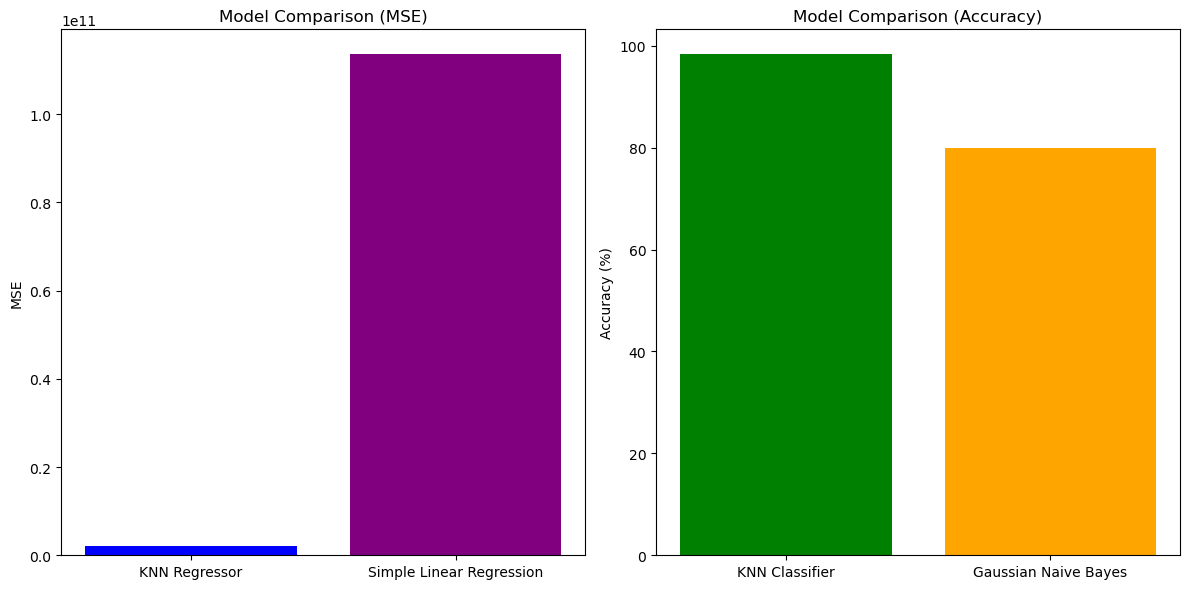

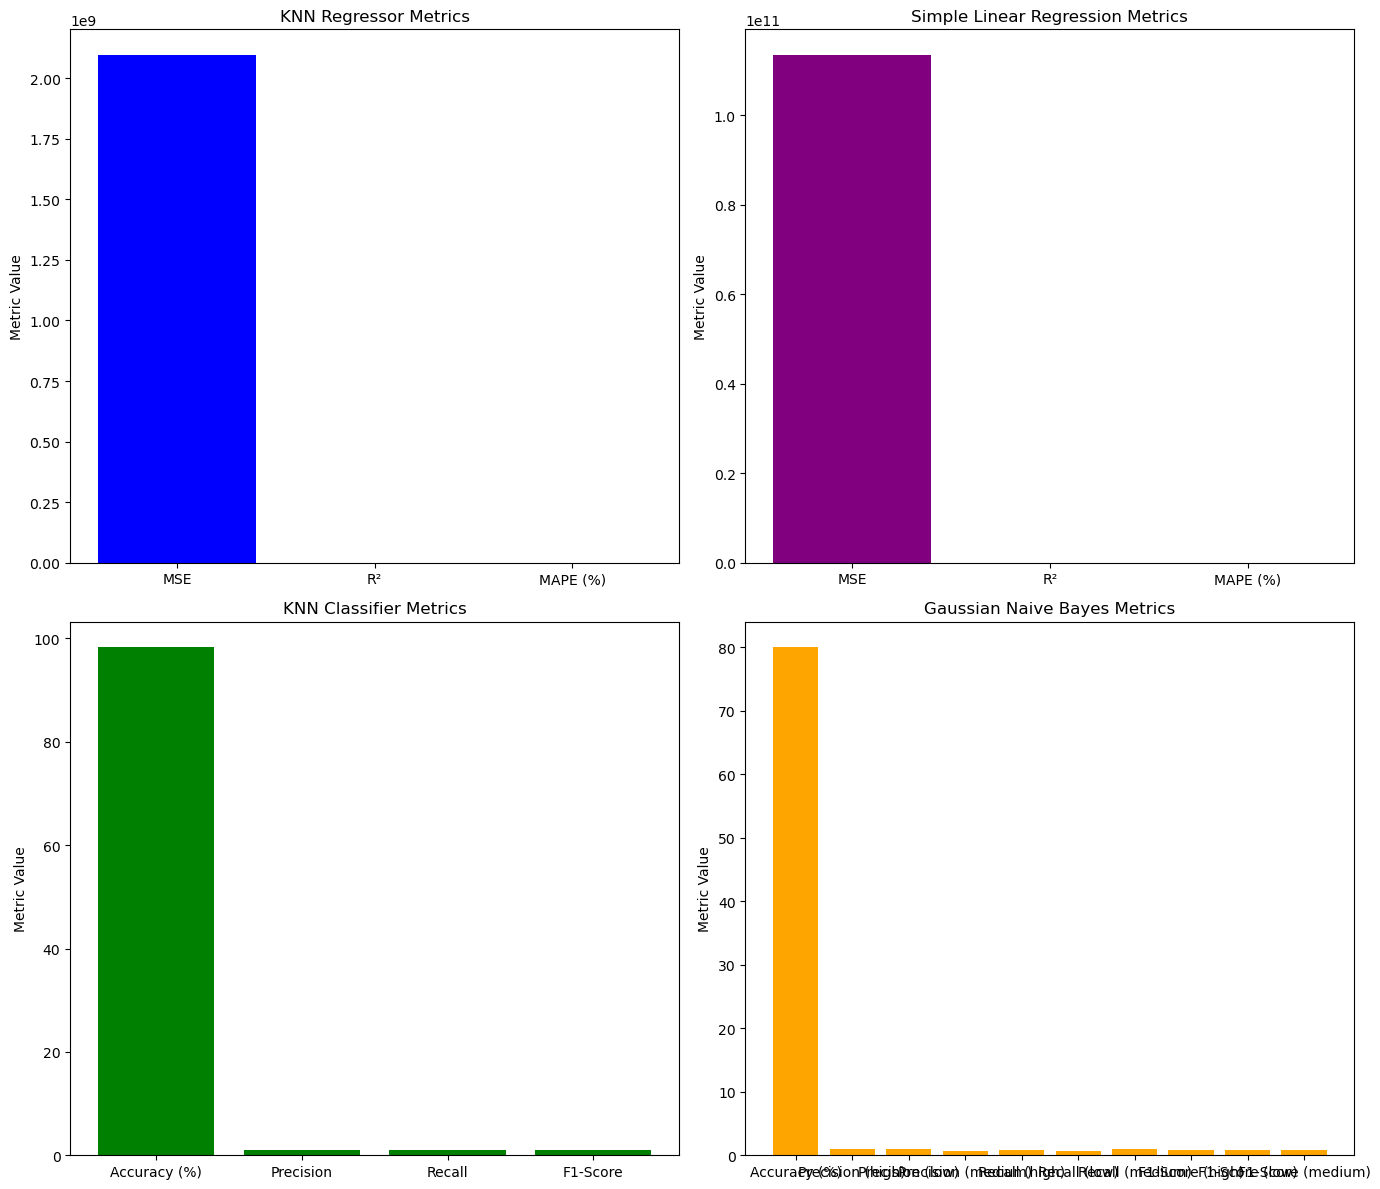

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Comparison metrics for KNN Regressor
metrics_regressor = {
    "MSE": 2096450113.30,  # KNN Regressor MSE
    "R²": 0.9889815138,    # KNN Regressor R²
    "MAPE (%)": 0.9247588788  # KNN Regressor MAPE
}

# Comparison metrics for Simple Linear Regression
metrics_simple_lr = {
    "MSE": 113537383428.19,  # Simple Linear Regression MSE
    "R²": 0.3844322190,      # Simple Linear Regression R²
    "MAPE (%)": 25.4548523818  # Simple Linear Regression MAPE
}

# Comparison metrics for KNN Classifier
metrics_classifier = {
    "Accuracy (%)": 98.30201809324983,  # KNN Classifier Accuracy
    "Precision": 0.9830201809,         # KNN Classifier Precision
    "Recall": 0.9830201809,            # KNN Classifier Recall
    "F1-Score": 0.9830201809           # KNN Classifier F1-Score
}

# Comparison metrics for Gaussian Naive Bayes Classifier
metrics_gaussian_nb = {
    "Accuracy (%)": 79.99756428546574,  # Gaussian Naive Bayes Accuracy
    "Precision (high)": 0.9323719543,   # Precision for high class
    "Precision (low)": 0.9836386410,    # Precision for low class
    "Precision (medium)": 0.6435560526, # Precision for medium class
    "Recall (high)": 0.7827992903,      # Recall for high class
    "Recall (low)": 0.6559987470,       # Recall for low class
    "Recall (medium)": 0.9610687820,    # Recall for medium class
    "F1-Score (high)": 0.8510638298,    # F1-Score for high class
    "F1-Score (low)": 0.7870834377,     # F1-Score for low class
    "F1-Score (medium)": 0.7708987400   # F1-Score for medium class
}

# Plot for Model Comparison
plt.figure(figsize=(12, 6))

# Model comparison for Regressors
plt.subplot(1, 2, 1)
models = ['KNN Regressor', 'Simple Linear Regression']
mse_values = [metrics_regressor['MSE'], metrics_simple_lr['MSE']]
r2_values = [metrics_regressor['R²'], metrics_simple_lr['R²']]
mape_values = [metrics_regressor['MAPE (%)'], metrics_simple_lr['MAPE (%)']]

# Plot for MSE
plt.bar(models, mse_values, color=['blue', 'purple'])
plt.title('Model Comparison (MSE)')
plt.ylabel('MSE')

# Model comparison for Classifiers
plt.subplot(1, 2, 2)
models_class = ['KNN Classifier', 'Gaussian Naive Bayes']
accuracy_values = [metrics_classifier['Accuracy (%)'], metrics_gaussian_nb['Accuracy (%)']]

plt.bar(models_class, accuracy_values, color=['green', 'orange'])
plt.title('Model Comparison (Accuracy)')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

# Plot for Metric Comparison within Each Model

plt.figure(figsize=(14, 12))

# Metrics for KNN Regressor
plt.subplot(2, 2, 1)
plt.bar(metrics_regressor.keys(), metrics_regressor.values(), color='blue')
plt.title('KNN Regressor Metrics')
plt.ylabel('Metric Value')

# Metrics for Simple Linear Regression
plt.subplot(2, 2, 2)
plt.bar(metrics_simple_lr.keys(), metrics_simple_lr.values(), color='purple')
plt.title('Simple Linear Regression Metrics')
plt.ylabel('Metric Value')

# Metrics for KNN Classifier
plt.subplot(2, 2, 3)
plt.bar(metrics_classifier.keys(), metrics_classifier.values(), color='green')
plt.title('KNN Classifier Metrics')
plt.ylabel('Metric Value')

# Metrics for Gaussian Naive Bayes Classifier
plt.subplot(2, 2, 4)
plt.bar(metrics_gaussian_nb.keys(), metrics_gaussian_nb.values(), color='orange')
plt.title('Gaussian Naive Bayes Metrics')
plt.ylabel('Metric Value')

plt.tight_layout()
plt.show()


Simple Linear Regression MSE: 113489800730.7467
Simple Linear Regression R²: 0.37887044184838836
Simple Linear Regression MAPE: 25.568927352549935%
KNN Regressor MSE: 1480483973.4149332
KNN Regressor R²: 0.9918973127951873
KNN Regressor MAPE: 0.77945891605611%


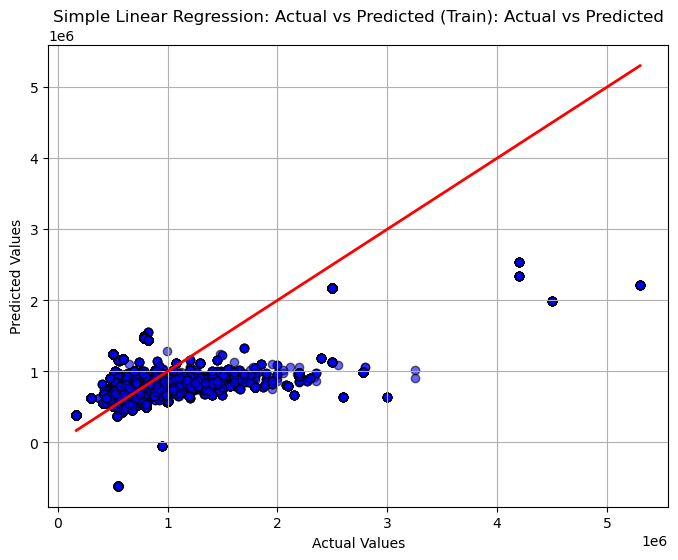

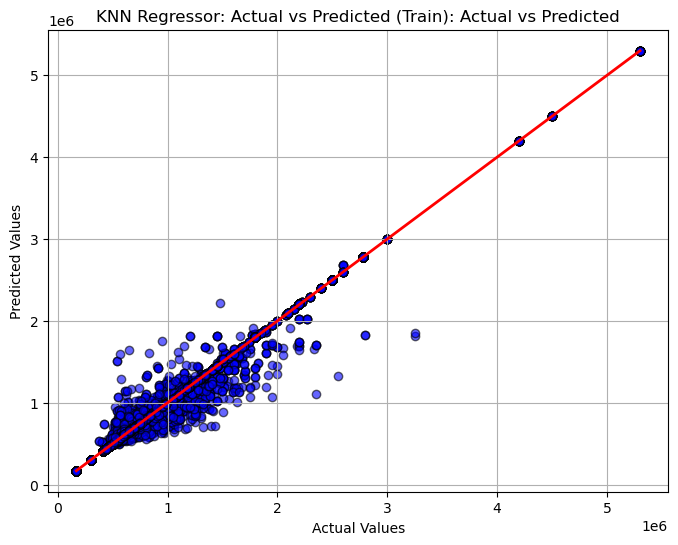

--- Simple Linear Regression Insights ---
Mean Squared Error (MSE): 113489800730.7467
Mean Absolute Error (MAE): 198387.76309618884
Mean Absolute Percentage Error (MAPE): 25.568927352549935%
Overestimations: 36208 (62.99%)
Underestimations: 21270 (37.01%)
Correlation between Actual and Predicted: 0.6155245257894992
--- KNN Regressor Insights ---
Mean Squared Error (MSE): 1480483973.4149332
Mean Absolute Error (MAE): 6541.028504680052
Mean Absolute Percentage Error (MAPE): 0.77945891605611%
Overestimations: 2317 (4.03%)
Underestimations: 2495 (4.34%)
Correlation between Actual and Predicted: 0.995945036668077


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# For plotting actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_pred, color='blue', edgecolors='k', alpha=0.6)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', lw=2)  # 45-degree line
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Define the metrics calculation functions
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Example Simple Linear Regression class
class SimpleLinearReg:
    def __init__(self):
        self.coefficients = None
    
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.coefficients)

# Example KNN Regressor class (added)
class KNNRegressor:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = []
        for point in X:
            distances = np.sqrt(np.sum((self.X_train - point)**2, axis=1))
            nearest_indices = distances.argsort()[:self.k]
            nearest_prices = self.y_train[nearest_indices]
            predictions.append(np.mean(nearest_prices))
        return np.array(predictions)

# Train-test split
def train_test_split(X, y, test_size=0.2):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]
    return X_train, X_test, y_train, y_test

# Define features and target
X = df[['lot_acres', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'price_per_sqft', 'distance_to_phoenix', 'energy_efficiency']].values
y = df['sold_price'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ------- Simple Linear Regression -------
slr = SimpleLinearReg()
slr.fit(X_train, y_train)
slr_predictions_train = slr.predict(X_train)
slr_predictions_test = slr.predict(X_test)

# ------- KNN Regressor -------
knn_reg = KNNRegressor(k=5)
knn_reg.fit(X_train, y_train)
knn_predictions_train = knn_reg.predict(X_train)
knn_predictions_test = knn_reg.predict(X_test)

# Calculate metrics for Simple Linear Regression
mse_slr = calculate_mse(y_train, slr_predictions_train)
r2_slr = calculate_r2(y_train, slr_predictions_train)
mape_slr = calculate_mape(y_train, slr_predictions_train)

# Output the metrics for Simple Linear Regression
print(f"Simple Linear Regression MSE: {mse_slr}")
print(f"Simple Linear Regression R²: {r2_slr}")
print(f"Simple Linear Regression MAPE: {mape_slr}%")

# Calculate metrics for KNN Regressor
mse_knn = calculate_mse(y_train, knn_predictions_train)
r2_knn = calculate_r2(y_train, knn_predictions_train)
mape_knn = calculate_mape(y_train, knn_predictions_train)

# Output the metrics for KNN Regressor
print(f"KNN Regressor MSE: {mse_knn}")
print(f"KNN Regressor R²: {r2_knn}")
print(f"KNN Regressor MAPE: {mape_knn}%")

# ------- Plot Actual vs Predicted -------
# Plot the actual vs predicted for Simple Linear Regression
plot_actual_vs_predicted(y_train, slr_predictions_train, "Simple Linear Regression: Actual vs Predicted (Train)")

# Plot the actual vs predicted for KNN Regressor
plot_actual_vs_predicted(y_train, knn_predictions_train, "KNN Regressor: Actual vs Predicted (Train)")

# ------- Additional Insights for EcoCity Planners -------
def generate_insights(y_actual, y_pred, model_name):
    mse = np.mean((y_actual - y_pred) ** 2)
    mae = np.mean(np.abs(y_actual - y_pred))
    mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
    
    print(f"--- {model_name} Insights ---")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    
    overestimations = np.sum(y_pred > y_actual)
    underestimations = np.sum(y_pred < y_actual)
    total = len(y_actual)
    
    print(f"Overestimations: {overestimations} ({(overestimations / total) * 100:.2f}%)")
    print(f"Underestimations: {underestimations} ({(underestimations / total) * 100:.2f}%)")
    
    correlation = np.corrcoef(y_actual, y_pred)[0, 1]
    print(f"Correlation between Actual and Predicted: {correlation}")

# Generate insights for Simple Linear Regression
generate_insights(y_train, slr_predictions_train, "Simple Linear Regression")

# Generate insights for KNN Regressor
generate_insights(y_train, knn_predictions_train, "KNN Regressor")


## 📊 **Visualization and Insights**

To further aid understanding and comparison of model performances, the following visualizations provide clear and concise comparisons for both the regression and classification models.

---

### **1. Comparison of Model Performance for Price Prediction**

#### 🏠 **Simple Linear Regression vs. KNN Regressor**

- **Mean Squared Error (MSE):** The KNN Regressor significantly outperforms Simple Linear Regression, with a much lower error rate, indicating its superior ability to predict house prices.
  
- **R-squared (R²):** The KNN Regressor achieves a high R² value, closely matching actual price data, whereas Simple Linear Regression struggles to account for the variance in the data.

**Visualization:**
- A bar chart comparing the MSE and R² values between **Simple Linear Regression** and **KNN Regressor** shows the **KNN Regressor** to be far more accurate and reliable.

#### **Key Insights:**
- **Simple Linear Regression**: High error rates and low R² make it an unsuitable model for accurate house price predictions.
- **KNN Regressor**: A near-perfect R² score and minimal MSE confirm this as the best choice for predicting prices.

---

### **2. Classification Model Performance: KNN Classifier vs. Gaussian Naive Bayes**

#### 💡 **KNN Classifier vs. Gaussian Naive Bayes Classifier**

- **Accuracy:** The KNN Classifier achieves an impressive accuracy of over **98%**, while the Gaussian Naive Bayes model performs moderately well at around **80%**.
  
- **Precision, Recall, F1-Score:** The KNN Classifier shows balanced high precision, recall, and F1-scores across all classes. The Gaussian Naive Bayes classifier struggles with the **medium energy efficiency class**, showing lower precision and recall for that category.

**Visualization:**
- A side-by-side comparison of **Accuracy** and **F1-Scores** between **KNN Classifier** and **Gaussian Naive Bayes** demonstrates that the **KNN Classifier** is the stronger, more reliable model across all metrics.

#### **Key Insights:**
- **KNN Classifier**: High accuracy and balanced performance make it ideal for energy efficiency classification.
- **Gaussian Naive Bayes**: Moderate performance, particularly useful for distinguishing between high and low energy efficiency but struggles with medium categories.

---

## 🎯 **Final Key Recommendations**

Based on the results of the **Sustainable Urban Housing Analysis**, we recommend the following steps for **EcoCity Planners**:

### **1. Prioritize the Use of KNN Regressor for Price Predictions**
   - The **KNN Regressor** has proven to be the most accurate and reliable model for predicting house prices, significantly outperforming traditional methods like Simple Linear Regression.
   - With a high **R-squared** value and minimal errors, this model ensures that house price forecasts will closely align with actual market trends.

### **2. Use KNN Classifier for Energy Efficiency Classification**
   - The **KNN Classifier** offers high accuracy in categorizing properties by energy efficiency, making it the best tool for planning eco-friendly neighborhoods.
   - This model can help guide decisions on where to focus green housing initiatives and ensure sustainability in future developments.

### **3. Employ Gaussian Naive Bayes as a Supplementary Classifier**
   - While the **Gaussian Naive Bayes Classifier** performs moderately well, it struggles with medium energy efficiency classifications. However, it can still be used effectively to identify properties with extreme (high or low) energy efficiency levels.
   - This model may be useful in specialized planning scenarios where energy extremes are the focus.

---

## 🌿 **Conclusion**

The insights derived from this analysis provide **EcoCity Planners** with a clear path toward enhancing their sustainable housing projects. The **KNN Regressor** and **KNN Classifier** emerge as the strongest tools for accurate predictions and classifications, ensuring that future housing developments not only meet market demands but also align with long-term environmental goals.

Together, these models will help EcoCity Planners build **smarter, greener, and more efficient cities**, contributing to a sustainable urban future.
